In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

import numpy as np
np.random.seed(0)

In [3]:
dogs_n_cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
dogs_n_cats

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [48]:
dogs_n_cats[(dogs_n_cats.Длина<14.5) & (dogs_n_cats.Вид=='собачка')]

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид


In [4]:
dogs_n_cats.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [7]:
X = dogs_n_cats.drop(['Вид'], axis=1)

In [8]:
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [26]:
y = pd.DataFrame(dogs_n_cats.Вид)

In [27]:
y

,Вид
0,собачка
1,собачка
2,собачка
3,собачка
4,собачка
...,...
995,котик
996,котик
997,котик
998,котик


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [29]:
scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores_data = pd.DataFrame({'max_depth': [max_depth], 
                                     'score_train': [score_train], 
                                     'score_test': [score_test],
                                     'cross_val_score': [mean_cross_val_score]
                                    })
    scores_data = pd.concat([scores_data, temp_scores_data], ignore_index=True)

In [30]:
scores_data_long = pd.melt(scores_data, 
                           id_vars = ['max_depth'], 
                           value_vars = ['score_train','score_test', 'cross_val_score'], 
                           var_name = 'set_type', 
                           value_name = 'score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

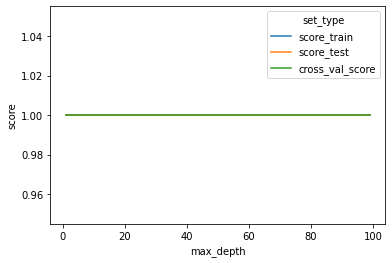

In [31]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [33]:
 clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Длина <= 14.5\nentropy = 1.0\nsamples = 670\nvalue = [335, 335]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [335, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [0, 335]')]

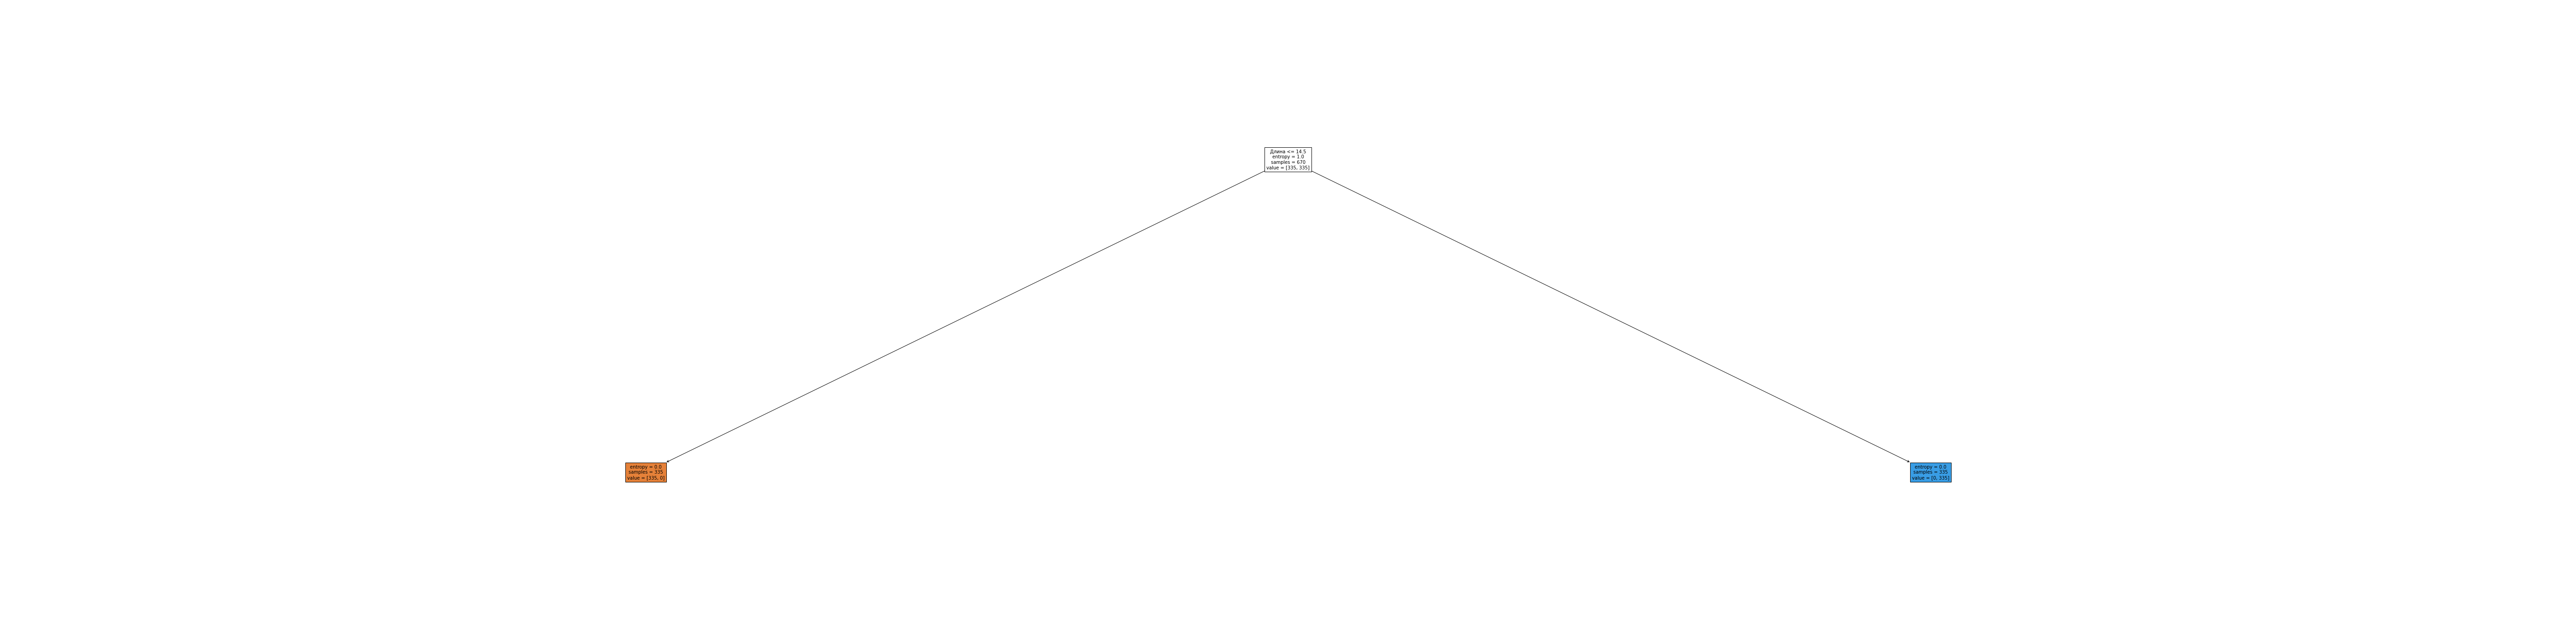

In [34]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [50]:
dogs_n_cats_test = pd.read_json('dataset_209691_15.txt')

In [51]:
dogs_n_cats_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,24,28.8,1,1,0
2,15,18.0,1,1,0
3,17,20.4,1,1,0
4,20,24.0,1,1,0
...,...,...,...,...,...
95,13,5.2,1,0,1
96,6,2.4,1,0,1
97,9,3.6,1,0,1
98,11,4.4,1,0,1


In [55]:
dogs_n_cats_test[(dogs_n_cats_test.Длина>14.5)].count()

Длина                 51
Высота                51
Шерстист              51
Гавкает               51
Лазает по деревьям    51
dtype: int64